In [2]:

!pip install yfinance

In [21]:
pip install keras

     |████████████████████████████████| 1.3 MB 2.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install tensorflow

     |████████████████████████████████| 199.0 MB 9.8 MB/s eta 0:00:014     |████████████████████████        | 148.8 MB 5.4 MB/s eta 0:00:10
     |████████████████████████████████| 2.9 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 1.3 MB/s  eta 0:00:01
     |████████████████████████████████| 65 kB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.9 MB 7.4 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 6.9 MB/s eta 0:00:01
     |████████████████████████████████| 132 kB 5.7 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 15.6 MB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 5.1 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 7.8 MB/s eta 0:00:01
     |████████████████████████████████| 154 kB

In [35]:

import pandas as pd
import numpy as np
import math 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential

from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

import yfinance as yf  # We will use this library to upload latest data from Yahoo API
%matplotlib inline

In [25]:
# define the ticker you will use
TSLA = yf.Ticker('TSLA')
#Display stock information, it will give you a summary description of the ticker
TSLA.info

{'zip': '94304',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 70757,
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits. It provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; and purchase financing and leasing services. This segment is also involved in the provision of non-warranty after-sales vehicle services, sale of used vehicles, retail merchandise, and vehicle insurance, as well as sale of products through its subsidiaries to third party customers; services for electric vehicles through its company-owned service locations, and Tesla mobile service technicians; and 

In [26]:
history = TSLA.history(period="Max")
df = pd.DataFrame(history)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,0,0.0
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,0,0.0
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,0,0.0
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,0,0.0
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,0,0.0
...,...,...,...,...,...,...,...
2021-10-15,823.739990,843.210022,822.349976,843.030029,18818000,0,0.0
2021-10-18,851.789978,875.260010,851.469971,870.109985,24207200,0,0.0
2021-10-19,877.530029,877.950012,862.510010,864.270020,17381100,0,0.0


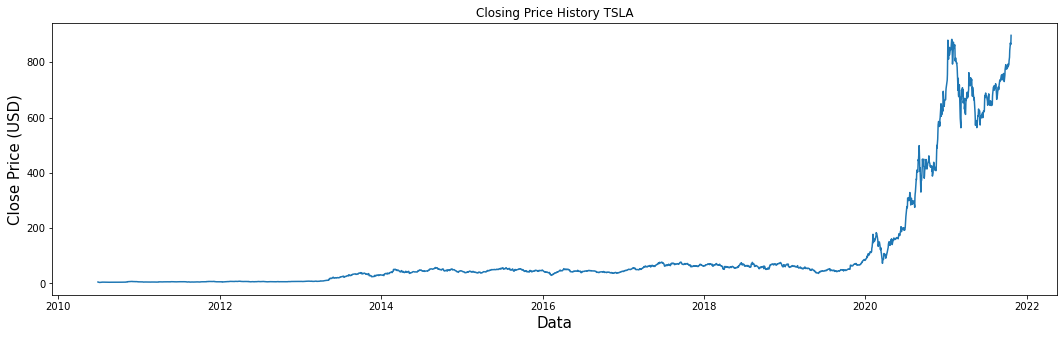

In [74]:
#Visualize the closing price history
plt.figure(figsize=(18,5))
plt.title('Closing Price History TSLA')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=15 )
plt.ylabel('Close Price (USD)', fontsize=15)
plt.show()

In [8]:
#Create a dataframe with only the 'Create Column
data= df.filter(['Close'])
#convert the dataframe to a numpy array
dataset= data.values
#get the number of rows to train the model on
training_data_len= math.ceil(len(dataset)* 0.85) #using 85% of the data, (first 85% of dataset)
training_data_len

2423

In [12]:
#Scale the all of the data to be values between 0 and 1 (making it easier to train the model)
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)
scaled_data

array([[0.00181303],
       [0.00179958],
       [0.0013805 ],
       ...,
       [0.9649048 ],
       [0.96661919],
       [1.        ]])

In [13]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(180,len(train_data)):
    x_train.append(train_data[i-180:i,0])
    y_train.append(train_data[i,0])

    if i<=180:
      print(x_train)
      print(y_train)
      print()

[array([1.81302706e-03, 1.79958054e-03, 1.38050052e-03, 7.61964309e-04,
       6.94730074e-05, 0.00000000e+00, 3.72017981e-04, 3.58571455e-04,
       2.80134008e-04, 5.24410790e-04, 9.05392944e-04, 9.16598294e-04,
       1.08467854e-03, 1.36929490e-03, 1.00848227e-03, 9.90553922e-04,
       1.16535716e-03, 1.23034835e-03, 1.15415208e-03, 1.06450928e-03,
       1.10260742e-03, 1.01968788e-03, 9.27803643e-04, 1.14742882e-03,
       1.37825907e-03, 1.22362509e-03, 1.04209858e-03, 8.49366196e-04,
       8.51607373e-04, 7.23866173e-04, 4.70624951e-04, 4.03392854e-04,
       5.64750102e-04, 6.67839425e-04, 7.50758959e-04, 6.65598248e-04,
       6.70080335e-04, 7.39553609e-04, 9.70384132e-04, 7.61964309e-04,
       9.18839470e-04, 8.85223422e-04, 8.74018072e-04, 9.12116207e-04,
       8.24714320e-04, 1.04209858e-03, 1.17880369e-03, 1.17656278e-03,
       1.06226784e-03, 1.14294646e-03, 1.10036651e-03, 9.79348305e-04,
       1.10260742e-03, 1.19225021e-03, 1.38498234e-03, 1.15191117e-03,
     

In [14]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2243, 180, 1)

In [37]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [39]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [40]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2243/2243 [==============================] - 104s 46ms/step - loss: 5.2009e-05


In [41]:
#Test data set
test_data = scaled_data[training_data_len - 180: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] 
for i in range(180,len(test_data)):
    x_test.append(test_data[i-180:i,0])

In [42]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [43]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [44]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)
#Undo scaling

In [46]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

290.4789712954453

<ipython-input-75-e1199f935f32>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


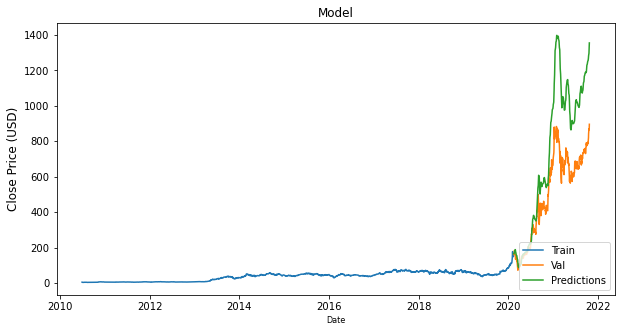

In [75]:
#Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(10,5))
plt.title('Model')
plt.xlabel('Date', fontsize=8)
plt.ylabel('Close Price (USD)', fontsize=12)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [48]:
valid

,Close,Predictions
Date,,
2020-02-13,160.800003,164.763748
2020-02-14,160.005997,166.439529
2020-02-18,171.679993,168.043579
2020-02-19,183.483994,171.147263
2020-02-20,179.882004,176.457352
...,...,...
2021-10-15,843.030029,1282.676758
2021-10-18,870.109985,1296.481567
2021-10-19,864.270020,1316.211914


In [49]:
#need to add prediction percentage score 

In [66]:
df['prediction']=valid['Predictions']/valid['Close']*100

In [70]:
df
#prediction shown as percentage 

,Open,High,Low,Close,Volume,Dividends,Stock Splits,prediction
Date,,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,0,0.0,NaN
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,0,0.0,NaN
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,0,0.0,NaN
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,0,0.0,NaN
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,0,0.0,NaN
...,...,...,...,...,...,...,...,...
2021-10-15,823.739990,843.210022,822.349976,843.030029,18818000,0,0.0,152.150779
2021-10-18,851.789978,875.260010,851.469971,870.109985,24207200,0,0.0,149.002033
2021-10-19,877.530029,877.950012,862.510010,864.270020,17381100,0,0.0,152.291747


In [71]:
#Comment: Im actually surprised that the predicted graph have such a simmular shape to the actual graph.
#But as you can see the predicted value overshoots a lot after a litle time (in the end over 150%). However for the first days, it is actually pretty accurate
